In [90]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
#%matplotlib inline

df = pd.read_excel(r'C:\Users\Rif010\Desktop\Clustering\Cluster.xlsx', sheet_name="People Records")
df.head()

,Name,Place name,Place type,SuperType
0,Kevin Vasquez,Diaz-Anderson,travel agency,Travel
1,NaN,"Wong, Myers and Peters",hospital,Health
2,NaN,Malone-Mcconnell,physiotherapist,Health
3,NaN,Frazier-Alvarado,rv park,Store
4,NaN,"Sweeney, Jones and Reynolds",lawyer,Service


In [91]:
Supertypes = pd.get_dummies(df['SuperType'])


In [92]:
from array import *
q = 5 # first 5 users
r = 30 # comparing with first 30 users with the first 5 users
cos = []
a=[]
pears = []

for i in range(0,q):
    cos.append([])
    pears.append([])
    a.append([])
    for j in range(0,r):
        cos[i].append(j)
        pears[i].append(j)
        a[i].append(j)
        a[i][j] = j
        cos[i][j]=0
        pears[i][j] = 0


X = Supertypes[0:50]
X = X.sum(axis=0)
x = X.to_numpy()
x = x.reshape(1,-1)
#Supertypes.itertuples()
for i in range(0,q):
    m = i
    if m>0 :
        X = Supertypes[(m*50)+1:(m+1)*50]
        X = X.sum(axis=0)
        x = X.to_numpy()
        x = x.reshape(1,-1)
        
    for j in range(0,r):
        n = j
        if m>q :
            break
        if n>r:
            break    
        if n>0:
            Y = Supertypes[(n*50)+1:(n+1)*50]
            Y = Y.sum(axis=0)
            y = Y.to_numpy()
            y = y.reshape(1,-1)
        else:
            Y = Supertypes[0:50]
            Y = Y.sum(axis=0)
            y = Y.to_numpy()
            y = y.reshape(1,-1)
        p = cosine_similarity(x,y)
        cos[m][n] = p[0][0]
        p,_ = pearsonr(X,Y)
        pears[m][n] = p

Comparison of other users ( 30 users) with the first user


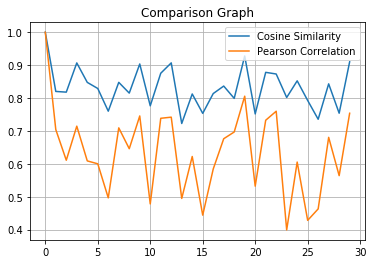

In [93]:
a = np.arange(0,r)
plt.plot(a,cos[0],label = "Cosine Similarity")
plt.plot(a,pears[0], label = "Pearson Correlation")
plt.legend()
plt.grid(True)
print("Comparison of other users (",r,"users) with the first user")
plt.title("Comparison Graph")
plt.savefig("Comparison1.png")

# Cosine Similarity Table Generation

In [94]:
indx = np.arange(1,r+1)

cosine = pd.DataFrame( index=indx)
cosine.columns.name = 'User'

for i in range(0,q):
    cosine.insert(loc=i, column=i+1, value=cos[i])
cosine.T

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
User,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.820073,0.817968,0.906744,0.847607,0.829054,0.760107,0.847711,0.815031,0.903540,...,0.751728,0.878120,0.873090,0.801678,0.852328,0.792627,0.735551,0.843115,0.753904,0.910174
2,0.820073,1.000000,0.878754,0.783439,0.943015,0.874032,0.923787,0.965446,0.892718,0.915479,...,0.929318,0.952185,0.925358,0.793704,0.872939,0.857142,0.914262,0.869409,0.954699,0.887625
3,0.817968,0.878754,1.000000,0.906256,0.930077,0.964453,0.893409,0.850584,0.929640,0.925713,...,0.938614,0.964377,0.943645,0.928388,0.933360,0.770644,0.920065,0.933471,0.908996,0.954247
4,0.906744,0.783439,0.906256,1.000000,0.868376,0.890705,0.766293,0.824207,0.812927,0.876604,...,0.827805,0.880264,0.903025,0.924769,0.890683,0.778386,0.810642,0.898774,0.782384,0.922053
5,0.847607,0.943015,0.930077,0.868376,1.000000,0.929958,0.936856,0.934562,0.930898,0.967432,...,0.948502,0.965201,0.920664,0.872011,0.953654,0.900406,0.944678,0.907068,0.959457,0.950620


# Pearson Correlation Table Genration

In [96]:
pearson = pd.DataFrame( index=indx)
pearson.columns.name = 'User'

for i in range(0,q):
    pearson.insert(loc=i, column=i+1, value=pears[i])
pearson.T

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
User,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.704192,0.610992,0.714544,0.608964,0.600119,0.496625,0.709364,0.646015,0.745580,...,0.532148,0.732522,0.759904,0.399186,0.605413,0.428264,0.463081,0.680545,0.564181,0.753760
2,0.704192,1.000000,0.800592,0.644697,0.936606,0.794380,0.877452,0.946525,0.825486,0.889162,...,0.886598,0.932661,0.879711,0.660235,0.805910,0.779300,0.861000,0.784699,0.928523,0.841157
3,0.610992,0.800592,1.000000,0.840836,0.862302,0.930983,0.800559,0.726440,0.874415,0.854481,...,0.896720,0.930663,0.896402,0.885362,0.872207,0.504369,0.855132,0.874815,0.852732,0.922565
4,0.714544,0.644697,0.840836,1.000000,0.641787,0.755530,0.494403,0.666735,0.650816,0.649590,...,0.718328,0.745751,0.860814,0.736566,0.687237,0.313681,0.635776,0.834921,0.640672,0.772289
5,0.608964,0.936606,0.862302,0.641787,1.000000,0.845306,0.884866,0.887991,0.885457,0.920064,...,0.933145,0.930016,0.855444,0.657261,0.885456,0.747896,0.910261,0.819670,0.968083,0.876691
